## Probability

In [1]:
import math
import numpy as np
import scipy
import sympy
import sklearn
import matplotlib.pyplot as plt

probability: strength of belief that an event (event A) will happen, or <br>
quantifying predictions of events yet to happen

likelihood: frequency of events (previous event A's) that have already occurred

Statistics and machine learning often use likelihood (the past) to predict probability (the future).

In [2]:
# Probabilities must sum to 1
P_x = 0.7
P_not_x = 1 - P_x
print(P_x)
print(round(P_not_x, 1))

0.7
0.3


In [3]:
# odds (ratio)
print("7:3")
odds = sympy.Rational(7, 3)
print(odds)
odds = odds.evalf()
print(odds)

7:3
7/3
2.33333333333333


In [4]:
# convert odds to probability
P_x = odds / (1 + odds)
print(round(P_x, 1))
P_x = sympy.Rational(P_x).limit_denominator(100)
print(P_x)

0.7
7/10


In [5]:
# convert probability to odds
O_x = P_x / (1 - P_x)
print(O_x)
O_x = O_x.evalf()
print(O_x)

7/3
2.33333333333333


Probability is theoretical and does not require data.

Statistics is practical and data is the foundation.

In [6]:
# joint probabilities
P_heads = sympy.Rational(1, 2)
P_4 = sympy.Rational(1, 6)
P_heads_and_4 = P_heads * P_4
print(P_heads)
print(P_4)
print(P_heads_and_4)

1/2
1/6
1/12


In [7]:
# union probabilities, mutually exclusive
P_4 = sympy.Rational(1, 6)
P_6 = sympy.Rational(1, 6)
P_4_or_6 = P_4 + P_6
print(P_4)
print(P_6)
print(P_4_or_6)

1/6
1/6
1/3


In [8]:
# union probabilities, nonmutually exclusive, double counting outcomes
P_1_through_5 = sympy.Rational(5, 6)
P_heads_or_1thru5 = P_heads + P_1_through_5
print(P_heads_or_1thru5)
print('Probability greater than 100%? -->', P_heads_or_1thru5 > 1.0)

4/3
Probability greater than 100%? --> True


In [9]:
# union probability, nonmutually exclusive
P_heads_or_4 = P_heads + P_4 - (P_heads * P_4)
print(P_heads)
print(P_4)
print(P_heads * P_4)
print(P_heads_or_4)

1/2
1/6
1/12
7/12


In [10]:
# conditional probability,
# bayes theorem,
# and using bayes theorem to flip conditional probabilities
p_coffee_drinker = 0.65
p_cancer = 0.005
p_coffee_drinker_given_cancer = 0.85
print('P(A|B) = P(B|A) * P(A) / P(B)')
p_cancer_given_coffee_drinker = (
    p_coffee_drinker_given_cancer * p_cancer
    / p_coffee_drinker
)
print(p_cancer_given_coffee_drinker)

P(A|B) = P(B|A) * P(A) / P(B)
0.006538461538461539


Clearly define thresholds (qualifications for data) in experiments!

1st ever drink this morning = coffee drinker <br>
5 cups a day for 10 years = coffee drinker

In [11]:
# joint conditional probability
no_conditional_probs = p_coffee_drinker * p_cancer
have_conditonal_probs = p_coffee_drinker_given_cancer * p_cancer
have_conditonal_probs2 = p_cancer_given_coffee_drinker * p_coffee_drinker
print('P(A AND B) = P(A|B) * P(B)')
print('P(A AND B) = P(B|A) * P(A)')
print('For P(coffee drinker AND cancer):')
print('If no conditional probabilities exist:', no_conditional_probs)
print('If exists P(coffee|cancer) and P(cancer):', have_conditonal_probs)
print('If exists P(cancer|coffee) and P(coffee):', have_conditonal_probs2)

P(A AND B) = P(A|B) * P(B)
P(A AND B) = P(B|A) * P(A)
For P(coffee drinker AND cancer):
If no conditional probabilities exist: 0.0032500000000000003
If exists P(coffee|cancer) and P(cancer): 0.00425
If exists P(cancer|coffee) and P(coffee): 0.00425


In [12]:
# union conditional probability
print('P(A OR B) = P(A) + P(B) - P(A AND B)')
print('P(A OR B) = P(A) + P(B) - (P(A|B) * P(B))')
print('P(A OR B) = P(A) + P(B) - (P(B|A) * P(A))')
p_coffee_drinker_or_cancer = (
    p_coffee_drinker + p_cancer
    - (p_coffee_drinker_given_cancer * p_cancer)
)
print(p_coffee_drinker_or_cancer)

P(A OR B) = P(A) + P(B) - P(A AND B)
P(A OR B) = P(A) + P(B) - (P(A|B) * P(B))
P(A OR B) = P(A) + P(B) - (P(B|A) * P(A))
0.65075


Binomial distribution: # success outcomes $k$ given success probability $p$ in # of trials $n$

Beta distribution: success probability $p$ given # success outcomes $k$ and # trials $n$

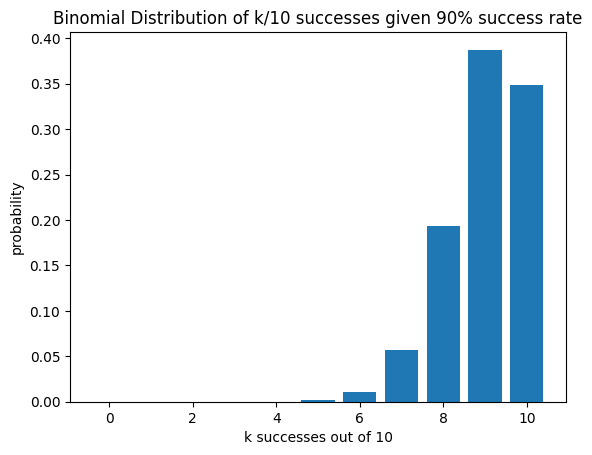

Probability of 8 successes (or less) is:
0.26390107089999976


In [13]:
# binomial distribution
# counting k successes in n trials given p probability
n = 10 # trials
k = 8 # successes
p = 0.9 # probability of success
probabilities = [scipy.stats.binom.pmf(k, n, p) for k in range(n+1)]
plt.bar(x= [i for i in range(n+1)], height= probabilities)
plt.xlabel('k successes out of 10')
plt.ylabel('probability')
plt.title('Binomial Distribution of k/10 successes given 90% success rate')
plt.show()

print('Probability of 8 successes (or less) is:')
print(sum(probabilities[:9]))

Binomial coefficient = "n choose k" = "out of n items, choose subset of size k"

$ \left(\begin{array}{c}n\\k\end{array}\right) = {n! \over k!(n-k)!}$

Binomial distribution: $ (\begin{array}{c}n\\k\end{array})p^{k}(1-p)^{n-k}$

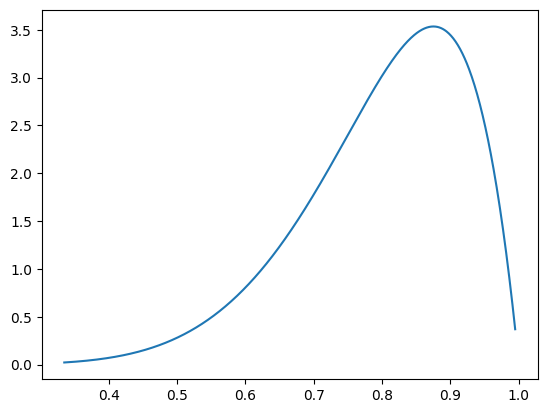

Given an underlying probability of 90%, the probability of having at least 8 successes is:
0.7748409780000002
Given 8 out of 10 successes, the chance of probability of success being 90% or more is:
0.22515902199999982


In [14]:
# beta distribution
# probability distribution of probabilities given k/n successes
a = 8 # successes
b = 2 # failures

x = np.linspace(
    scipy.stats.beta.ppf(0.001, a, b),
    scipy.stats.beta.ppf(0.999, a, b),
    1000
)
plt.plot(x, scipy.stats.beta.pdf(x, a, b))
plt.show()

print('Given an underlying probability of 90%, the probability of having at least 8 successes is:')
p_le8 = scipy.stats.beta.cdf(0.9, a, b)
print(p_le8)
print('Given 8 out of 10 successes, the chance of probability of success being 90% or more is:')
p_ge9 = 1 - scipy.stats.beta.cdf(0.9, a, b)
print(p_ge9)

Beta distribution cannot evaluate for one probability, but rather a range of probabilities

$ \int\limits_\beta^\alpha \frac{p^{a-1}(1-p)^{b-1}(a+b-1)!}{(a-1)!(b-1)!}\mathrm{d}p $, where

$\alpha$ = upper bound probability, <br>
$\beta$ = lower bound probability, <br>
$a$ = observed successes, and <br>
$b$ = observed failures

In [15]:
# exercise 1
rain = 0.3 # probability of rain
umbrella = 0.4 # probability that umbrella arrives on time
rain_and_umbrella = rain * umbrella # P(rain AND umbrella)
print(rain_and_umbrella)

0.12


In [16]:
# exercise 2
rain_or_umbrella = rain + umbrella - rain_and_umbrella # P(rain OR umbrella)
print(rain_or_umbrella)
# INCORRECT (misunderstood prompt)

no_rain_and_umbrella = (1-rain) * umbrella
no_rain_or_umbrella = (1-rain) + umbrella - no_rain_and_umbrella
print(no_rain_or_umbrella)

0.58
0.8200000000000001


In [17]:
# exercise 3
umbrella_given_rain = 0.2 # P(umbrella|rain)
# P(rain AND umbrella) = P(umbrella|rain) * P(rain)
rain_and_umbrella = umbrella_given_rain * rain
print(rain_and_umbrella)

0.06


In [18]:
# exercise 4
n = 137 # passengers (trials)
k = 50 # no-shows (successes)
p = 0.4 # no-show estimate (probability)

gt50 = 0.0 # probability of >=50 passengers not showing up

for i in range(n+1):
    if i >= k:
        probability = scipy.stats.binom.pmf(i, n, p)
        gt50 += probability

print(gt50) # add individual probabilities

cdf = scipy.stats.binom.cdf(k-1, n, p)

print(1-cdf) # using cumulative distribution function

0.8220955881474251
0.8220955881474242


In [19]:
# exercise 5
n = 19 # coin flips (trials)
a = 15 # heads (successes)
b = 4 # tails (failures)
p = 0.5 # fair coin probability

p_fair_coin = scipy.stats.beta.cdf(p, a, b)

print(p_fair_coin)
print('This is highly unlikely to be a fair coin.')

0.0037689208984375
This is highly unlikely to be a fair coin.
